In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

import scipy.stats as stats
from scipy.interpolate import interp1d

from loess.loess_1d import loess_1d as loess

plt.rcParams['axes.linewidth'] = 1.5

In [2]:
def subplots_centered(nrows, ncols, figsize, nfigs):
    """
    Modification of matplotlib plt.subplots(),
    useful when some subplots are empty.
    
    It returns a grid where the plots
    in the **last** row are centered.
    
    Inputs
    ------
        nrows, ncols, figsize: same as plt.subplots()
        nfigs: real number of figures
    """
    assert nfigs < nrows * ncols, "No empty subplots, use normal plt.subplots() instead"
    
    fig = plt.figure(figsize=figsize)
    axs = []
    
    m = nfigs % ncols
    m = range(1, ncols+1)[-m]  # subdivision of columns
    gs = gridspec.GridSpec(nrows, m*ncols)

    for i in range(0, nfigs):
        row = i // ncols
        col = i % ncols

        if row == nrows-1: # center only last row
            off = int(m * (ncols - nfigs % ncols) / 2)
        else:
            off = 0

        ax = plt.subplot(gs[row, m*col + off : m*(col+1) + off])
        axs.append(ax)
        
    return fig, axs

In [3]:
df = pd.read_csv('Data/MeiklejohnCa.csv')
# Remove samples that do not have d44Ca values, store as df_ca
df_ca = df.dropna(subset=['d44Ca', 'd13C'])

df_src= df.dropna(subset=['Sr/Ca', 'd13C'])

df_srca= df.dropna(subset=['Sr/Ca', 'd44Ca'])

df_mgca= df.dropna(subset=['Mg/Ca', 'd44Ca'])
df_mgca = df_mgca[df_mgca['Mg/Ca']<150]

df_mgc= df.dropna(subset=['Mg/Ca', 'd13C'])
df_mgc = df_mgc[df_mgc['Mg/Ca']<150]

In [4]:
# Load Conodont Sr
dsr = pd.read_csv('Data/MeiklejohnSrCono.csv')
dsr.head(3)

,SampleID,MeterComp,Meter,SrCono
0,MP-18c,322.0,13.0,0.708770
1,5-8-78-Oc,398.4,89.4,0.708740
2,5-8-78-Ic,449.9,140.9,0.708791


In [5]:
dx = pd.read_csv('Data/MeiklejohnC.csv')
dx.head()

,SampleID,Meter,MeterComp,Formation,d13c,d18o,d13corg,D13C,Age,Facies,F_Num,FaciesAssociation,Fa_Num
0,330278.2,271.0,580.0,Upper Mbr. AVLS,-2.222833,-8.434089,-28.462173,26.239340,455.82,F2E,1,FA5,1
1,330278.1,270.0,579.0,Upper Mbr. AVLS,-2.713545,-10.314913,-27.679694,24.966149,455.88,F2E,1,FA5,1
2,330278.0,265.0,574.0,Upper Mbr. AVLS,-2.122432,-9.102578,-28.320312,26.197880,455.94,F2E,1,FA5,1
3,330277.0,263.5,572.5,Upper Mbr. AVLS,-2.501667,-9.371778,NaN,NaN,455.99,F2E,1,FA5,1
4,330276.0,262.0,571.0,Upper Mbr. AVLS,-1.862418,-8.080376,-28.140709,26.278291,456.09,F2E,1,FA5,1


In [6]:
# Formation
fm_base = np.array([1, 16, 101.5])
fm_top = np.array([16, 101.5, 271])
fm = ['L.', 'Middle Mbr.', 'Upper Mbr.']
fm_h = fm_top - fm_base

Pearson R = -0.513
Pearson p value = 0.051
Spearman Rho = -0.569
Spearman p value = 0.027
Kendall Tau = -0.337
Kendall p value = 0.083


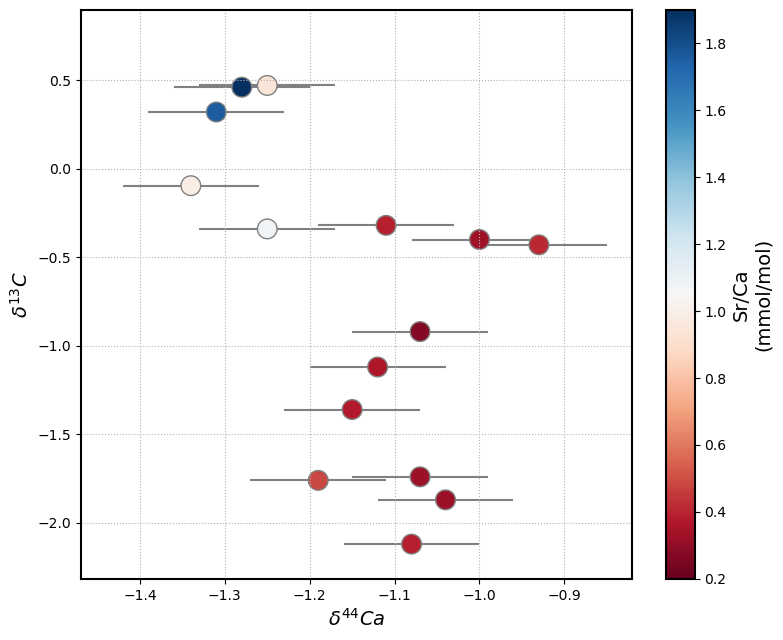

In [7]:
# Calculate pearson's r and spearman's rho values
r1, p1 = stats.pearsonr(df_ca["d44Ca"], df_ca["d13C"])
print('Pearson R = {:.3f}'.format(r1))
print('Pearson p value = {:.3f}'.format(p1))

r2, p2 = stats.spearmanr(df_ca["d44Ca"], df_ca["d13C"])
print('Spearman Rho = {:.3f}'.format(r2))
print('Spearman p value = {:.3f}'.format(p2))

r3, p3 = stats.kendalltau(df_ca["d44Ca"], df_ca["d13C"])
print('Kendall Tau = {:.3f}'.format(r3))
print('Kendall p value = {:.3f}'.format(p3))


# Make cross plot of d13C and d44Ca
fig = plt.figure(figsize=(8,6.5))
ax = fig.add_subplot(111)

mplot = ax.scatter(df["d44Ca"], df["d13C"], c=df["Sr/Ca"], cmap='RdBu', 
           vmin=0.2, vmax=1.9, ec='gray', s=200)

ax.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.05, fmt='none', ecolor='gray',
            zorder=-2)

# Add colorbar
cbar = fig.colorbar(mplot, ax=ax)

# Set ticklabels for the x axis
# ax.set_xticks(np.linspace(-1.7, -0.9, 5))

ax.set_xlabel('$\delta^{44}Ca$', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)
cbar.ax.set_ylabel('Sr/Ca\n(mmol/mol)', fontsize=14)

ax.grid(linestyle=":")

plt.tight_layout()
# plt.savefig("Figure/XPlot_d13C_d44Ca.png", dpi=300)
# plt.savefig("Figure/XPlot_d13C_d44Ca.svg")

Pearson R = -0.822
Pearson p value = 0.000
Spearman Rho = -0.822
Spearman p value = 0.000
Kendall Tau = -0.644
Kendall p value = 0.001


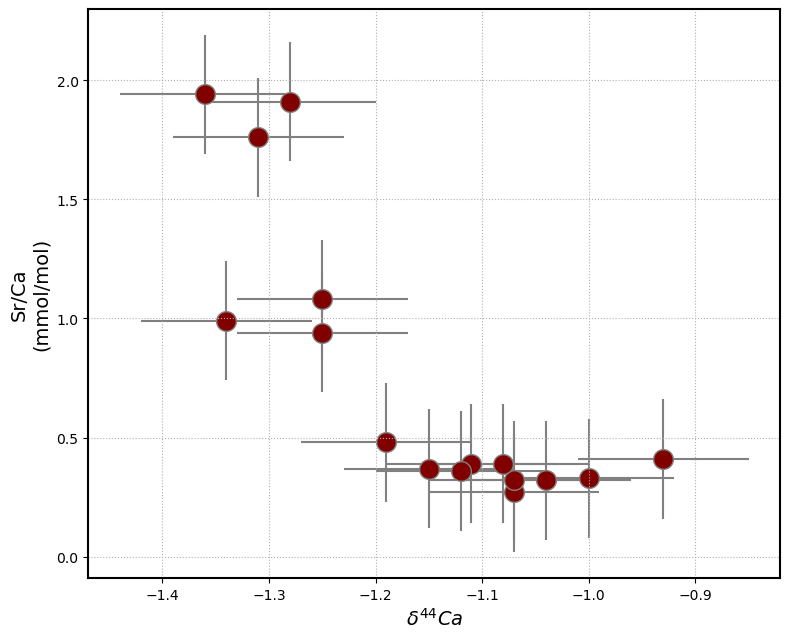

In [8]:
# Calculate pearson's r and spearman's rho values
r1, p1 = stats.pearsonr(df_srca["d44Ca"], df_srca["Sr/Ca"])
print('Pearson R = {:.3f}'.format(r1))
print('Pearson p value = {:.3f}'.format(p1))

r2, p2 = stats.spearmanr(df_srca["d44Ca"], df_srca["Sr/Ca"])
print('Spearman Rho = {:.3f}'.format(r2))
print('Spearman p value = {:.3f}'.format(p2))

r3, p3 = stats.kendalltau(df_srca["d44Ca"], df_srca["Sr/Ca"])
print('Kendall Tau = {:.3f}'.format(r3))
print('Kendall p value = {:.3f}'.format(p3))

# Make cross plot of d13C and d44Ca
fig = plt.figure(figsize=(8,6.5))
ax = fig.add_subplot(111)

ax.scatter(df_srca["d44Ca"], df_srca["Sr/Ca"], fc='maroon', ec='gray', s=200)

ax.errorbar(df_srca["d44Ca"], df_srca["Sr/Ca"], xerr=0.08, yerr=0.25, fmt='none', ecolor='gray',
            zorder=-2)



# Set ticklabels for the x axis
# ax.set_xticks(np.linspace(-1.7, -0.9, 5))

ax.set_xlabel('$\delta^{44}Ca$', fontsize=14)
ax.set_ylabel('Sr/Ca\n(mmol/mol)', fontsize=14)

ax.grid(linestyle=":")

plt.tight_layout()
# plt.savefig("Figure/XPlot_SrCa_d44Ca.png", dpi=300)
# plt.savefig("Figure/XPlot_SrCa_d44Ca.svg")

Pearson R = -0.578
Pearson p value = 0.024
Spearman Rho = -0.584
Spearman p value = 0.022
Kendall Tau = -0.498
Kendall p value = 0.010


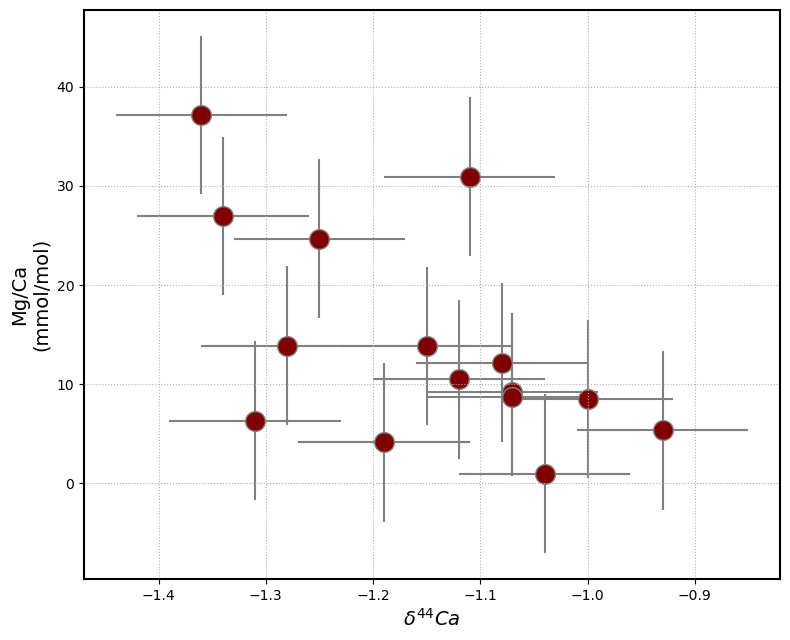

In [9]:

# Calculate pearson's r and spearman's rho values
r1, p1 = stats.pearsonr(df_mgca["d44Ca"], df_mgca["Mg/Ca"])
print('Pearson R = {:.3f}'.format(r1))
print('Pearson p value = {:.3f}'.format(p1))

r2, p2 = stats.spearmanr(df_mgca["d44Ca"], df_mgca["Mg/Ca"])
print('Spearman Rho = {:.3f}'.format(r2))
print('Spearman p value = {:.3f}'.format(p2))

r3, p3 = stats.kendalltau(df_mgca["d44Ca"], df_mgca["Mg/Ca"])
print('Kendall Tau = {:.3f}'.format(r3))
print('Kendall p value = {:.3f}'.format(p3))

# Make cross plot of d13C and d44Ca
fig = plt.figure(figsize=(8,6.5))
ax = fig.add_subplot(111)

ax.scatter(df_mgca["d44Ca"], df_mgca["Mg/Ca"], fc='maroon', ec='gray', s=200)

ax.errorbar(df_mgca["d44Ca"], df_mgca["Mg/Ca"], xerr=0.08, yerr=8, fmt='none', ecolor='gray',
            zorder=-2)



# Set ticklabels for the x axis
# ax.set_xticks(np.linspace(-1.7, -0.9, 5))

ax.set_xlabel('$\delta^{44}Ca$', fontsize=14)
ax.set_ylabel('Mg/Ca\n(mmol/mol)', fontsize=14)

ax.grid(linestyle=":")

plt.tight_layout()
# plt.savefig("Figure/XPlot_MgCa_d44Ca.png", dpi=300)
# plt.savefig("Figure/XPlot_MgCa_d44Ca.svg")

Pearson R = 0.765
Pearson p value = 0.000
Spearman Rho = 0.686
Spearman p value = 0.002
Kendall Tau = 0.489
Kendall p value = 0.006


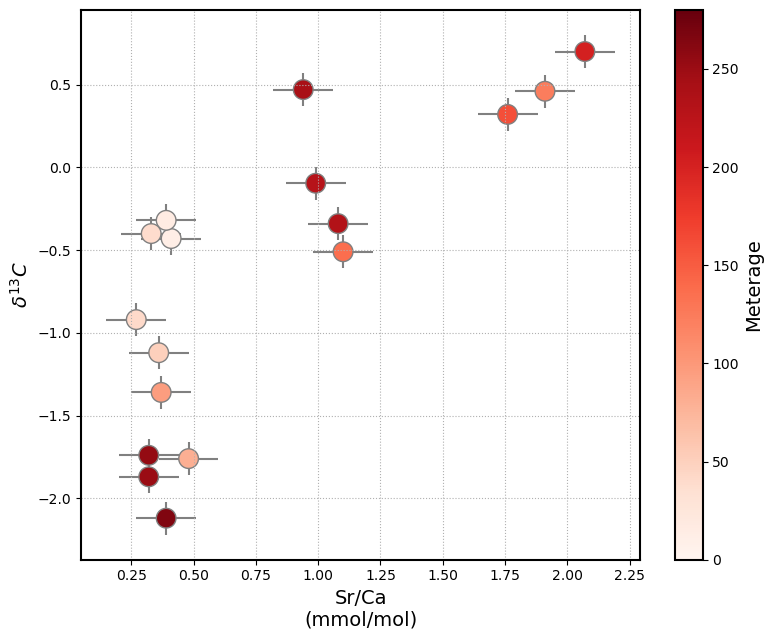

In [10]:
# Calculate pearson's r and spearman's rho values
r1, p1 = stats.pearsonr(df_src["Sr/Ca"], df_src["d13C"])
print('Pearson R = {:.3f}'.format(r1))
print('Pearson p value = {:.3f}'.format(p1))

r2, p2 = stats.spearmanr(df_src["Sr/Ca"], df_src["d13C"])
print('Spearman Rho = {:.3f}'.format(r2))
print('Spearman p value = {:.3f}'.format(p2))

r3, p3 = stats.kendalltau(df_src["Sr/Ca"], df_src["d13C"])
print('Kendall Tau = {:.3f}'.format(r3))
print('Kendall p value = {:.3f}'.format(p3))


# Make cross plot of d13C and Sr/Ca
fig = plt.figure(figsize=(8,6.5))
ax = fig.add_subplot(111)

mplot = ax.scatter(df_src["Sr/Ca"], df_src["d13C"], c=df_src["Meterage"], cmap='Reds', 
           vmin=0, vmax=280, ec='gray', s=200)

ax.errorbar(df_src["Sr/Ca"], df_src["d13C"], xerr=0.12, yerr=0.1, fmt='none', ecolor='gray',
            zorder=-2)

# Add colorbar
cbar = fig.colorbar(mplot, ax=ax)

# Set ticklabels for the x axis
# ax.set_xticks(np.linspace(-1.7, -0.9, 5))

ax.set_xlabel('Sr/Ca\n(mmol/mol)', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)
cbar.ax.set_ylabel('Meterage', fontsize=14)

ax.grid(linestyle=":")

plt.tight_layout()
# plt.savefig("Figure/XPlot_d13C_SrCa.png", dpi=300)
# plt.savefig("Figure/XPlot_d13C_SrCa.svg")

Pearson R = 0.567
Pearson p value = 0.022
Spearman Rho = 0.550
Spearman p value = 0.027
Kendall Tau = 0.417
Kendall p value = 0.026


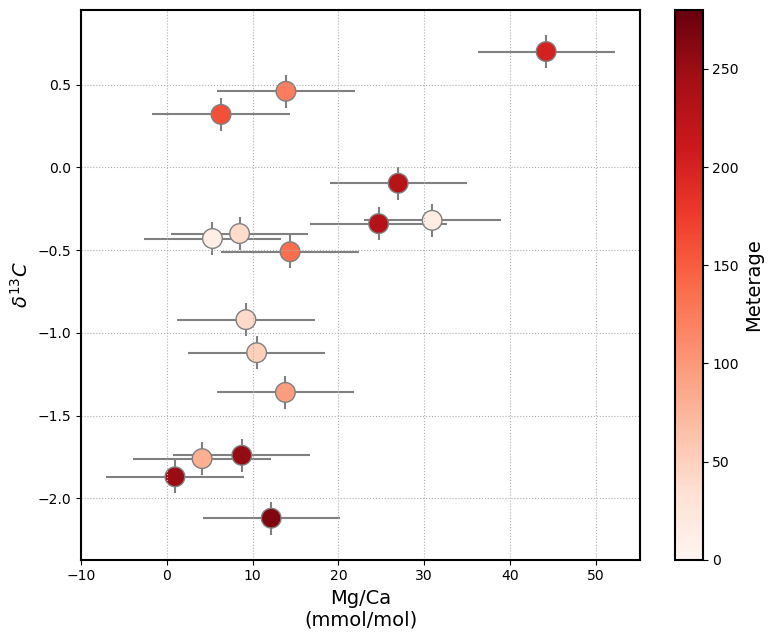

In [11]:
# Calculate pearson's r and spearman's rho values
r1, p1 = stats.pearsonr(df_mgc["Mg/Ca"], df_mgc["d13C"])
print('Pearson R = {:.3f}'.format(r1))
print('Pearson p value = {:.3f}'.format(p1))

r2, p2 = stats.spearmanr(df_mgc["Mg/Ca"], df_mgc["d13C"])
print('Spearman Rho = {:.3f}'.format(r2))
print('Spearman p value = {:.3f}'.format(p2))

r3, p3 = stats.kendalltau(df_mgc["Mg/Ca"], df_mgc["d13C"])
print('Kendall Tau = {:.3f}'.format(r3))
print('Kendall p value = {:.3f}'.format(p3))


# Make cross plot of d13C and Sr/Ca
fig = plt.figure(figsize=(8,6.5))
ax = fig.add_subplot(111)

mplot = ax.scatter(df_mgc["Mg/Ca"], df_mgc["d13C"], c=df_mgc["Meterage"], cmap='Reds', 
           vmin=0, vmax=280, ec='gray', s=200)

ax.errorbar(df_mgc["Mg/Ca"], df_mgc["d13C"], xerr=8, yerr=0.1, fmt='none', ecolor='gray',
            zorder=-2)

# Add colorbar
cbar = fig.colorbar(mplot, ax=ax)

# Set ticklabels for the x axis
# ax.set_xticks(np.linspace(-1.7, -0.9, 5))

ax.set_xlabel('Mg/Ca\n(mmol/mol)', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)
cbar.ax.set_ylabel('Meterage', fontsize=14)

ax.grid(linestyle=":")

plt.tight_layout()
# plt.savefig("Figure/XPlot_d13C_MgCa.png", dpi=300)
# plt.savefig("Figure/XPlot_d13C_MgCa.svg")

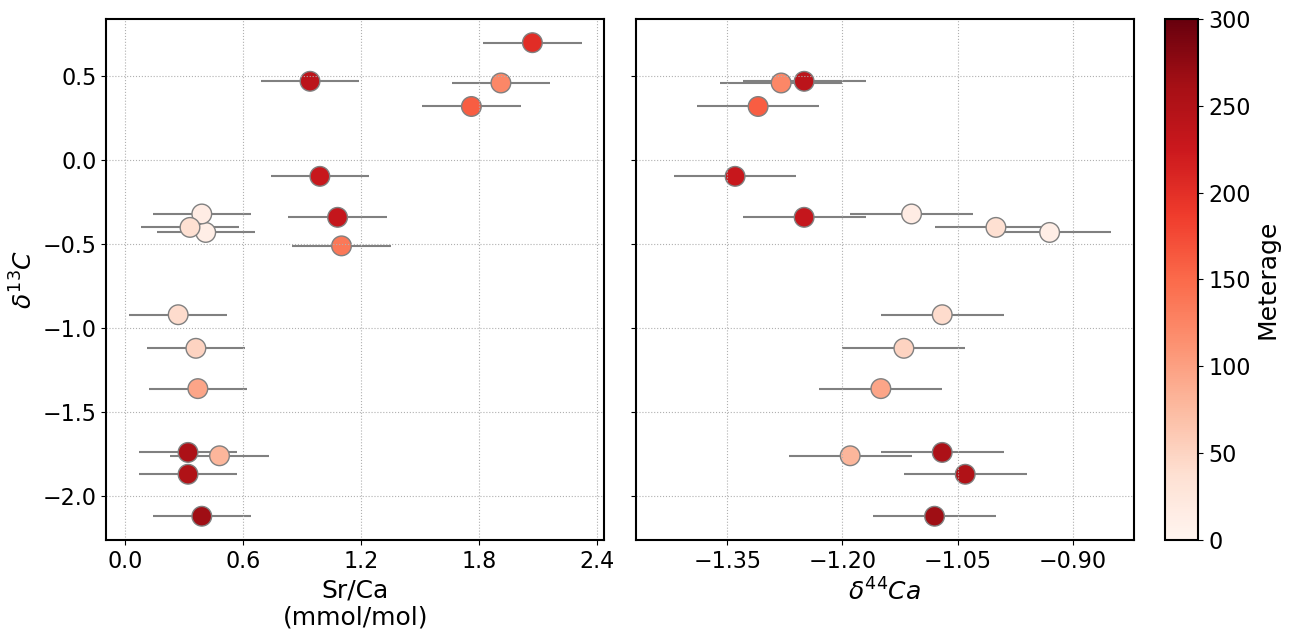

In [12]:
# Make cross plot of d13C and Sr/Ca
fig = plt.figure(figsize=(13,6.5))

w = [3, 3, 0.2]
h = [1]

gs = fig.add_gridspec(ncols=3, nrows=1, width_ratios=w, height_ratios=h)

ax = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1], sharey=ax)
axc = fig.add_subplot(gs[0,2])

mplot = ax.scatter(df["Sr/Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=200)
ax.errorbar(df["Sr/Ca"], df["d13C"], xerr=0.25, fmt='none', ecolor='gray',
            zorder=-2)

# Add colorbar
# cbar = fig.colorbar(mplot, ax=ax)

# Set ticklabels for the x axis
# ax.set_xticks(np.linspace(-1.7, -0.9, 5))

ax.set_xlabel('Sr/Ca\n(mmol/mol)', fontsize=18)
ax.set_ylabel('$\delta^{13}C$', fontsize=18)

ax.grid(linestyle=":")


mplot = ax1.scatter(df["d44Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=200)

ax1.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, fmt='none', ecolor='gray',
            zorder=-2)

ax1.tick_params(axis='y', labelleft=False)

# Add colorbar
cbar = fig.colorbar(mplot, cax=axc)



ax1.set_xlabel('$\delta^{44}Ca$', fontsize=18)
cbar.ax.set_ylabel('Meterage', fontsize=18)
ax1.grid(linestyle=":")


for a in [ax, ax1, axc]:
    a.tick_params(labelsize=16)
    if a != axc:
        a.xaxis.set_major_locator(plt.MaxNLocator(5))


plt.tight_layout()
# plt.savefig("Figure/XPlot_d13C_d44Ca_SrCa_Meterage.png", dpi=300)

In [13]:
# Calculate pearson r and p values
rcca, pcca = stats.pearsonr(df_ca["d44Ca"], df_ca["d13C"])
rcsr, pcsr = stats.pearsonr(df_src["Sr/Ca"], df_src["d13C"])
rcasr, pcasr = stats.pearsonr(df_srca["d44Ca"], df_srca["Sr/Ca"])
rcamg, pcamg = stats.pearsonr(df_mgca["d44Ca"], df_mgca["Mg/Ca"])

Rs = [rcsr, rcasr, rcca, rcamg]
Ps = [pcsr, pcasr, pcca, pcamg]
Xs = [df_src["Sr/Ca"], df_srca["d44Ca"], df_ca["d44Ca"], df_mgca["d44Ca"]]
Ys = [df_src["d13C"], df_srca["Sr/Ca"], df_ca["d13C"], df_mgca["Mg/Ca"]]

rcasrLog, pcasrLog = stats.pearsonr(df_srca["d44Ca"], np.log10(df_srca["Sr/Ca"]))
YsLog = [df_src["d13C"], np.log10(df_srca["Sr/Ca"]), df_ca["d13C"], df_mgca["Mg/Ca"]]

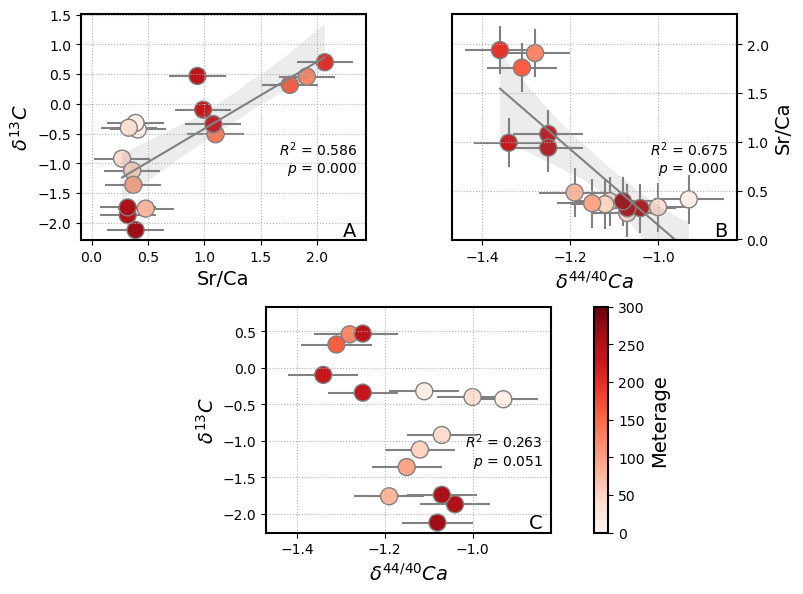

In [14]:
fig, axs = subplots_centered(nrows=2, ncols=2, figsize=(8,6), nfigs=3)

ax = axs[0]
ax1 = axs[1]
ax2 = axs[2]

ax.scatter(df["Sr/Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)
ax.errorbar(df["Sr/Ca"], df["d13C"], xerr=0.25, fmt='none', ecolor='gray',
            zorder=-2)




ax1.scatter(df["d44Ca"], df["Sr/Ca"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)
ax1.errorbar(df["d44Ca"], df["Sr/Ca"], xerr=0.08, yerr=0.25, fmt='none', ecolor='gray',
            zorder=-2)

ax1.tick_params(axis='y', left=False, right=True, labelleft=False,
                labelright=True)
ax1.yaxis.set_label_position('right')
ax1.set_ylim(-0.01, 2.31)


mplot = ax2.scatter(df["d44Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)

ax2.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, fmt='none', ecolor='gray',
            zorder=-2)

for a in [ax, ax1, ax2]:
    a.grid(linestyle=":")

# Add p and r values
for a, r, p, x, y, cnt in zip([ax, ax1, ax2], Rs,
                   Ps, Xs, Ys, range(len(Xs))):
    a.text(0.97, 0.3, '$R^2$ = {:.3f}\n$p$ = {:.3f}'.format(r**2, p),
           transform=a.transAxes, ha='right')
    if cnt != 2:
        sns.regplot(x=x, y=y, ax=a, scatter=False,
                line_kws=dict(color="grey", lw=1.5))

ax.set_xlabel('Sr/Ca', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)
ax1.set_ylabel('Sr/Ca', fontsize=14)
ax1.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax2.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax2.set_ylabel('$\delta^{13}C$', fontsize=14)

fig.tight_layout()

axins = inset_axes(
    ax2,
    width="5%",  # width: 5% of parent_bbox width
    height="100%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1.15, 0., 1, 1),
    bbox_transform=ax2.transAxes,
    borderpad=0,
)

# Add colorbar
cbar = fig.colorbar(mplot, cax=axins)
cbar.ax.set_ylabel('Meterage', fontsize=14)

# Label
for a , s in zip([ax, ax1, ax2], ['A', 'B', 'C']):
    a.text(0.92, 0.02, s, transform=a.transAxes, fontsize=14)

plt.savefig("Figure/XPlot_stacked_d13C_d44Ca_SrCa_Meterage.png", dpi=300)
plt.savefig("Figure/XPlot_stacked_d13C_d44Ca_SrCa_Meterage.svg")

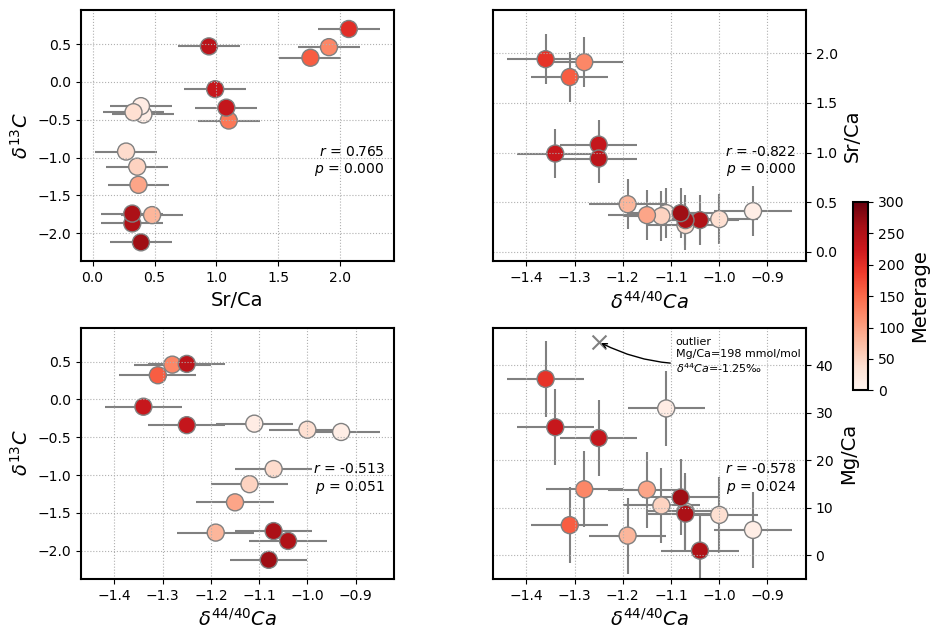

In [15]:
# Make cross plot of d13C and Sr/Ca
fig = plt.figure(figsize=(9.5,6.5))

w = [3, 3, 0.2]
h = [1, 1]

gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=w, height_ratios=h)

ax = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
axc = fig.add_subplot(gs[1,2])


ax.scatter(df["Sr/Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)
ax.errorbar(df["Sr/Ca"], df["d13C"], xerr=0.25, yerr=0.1,fmt='none', ecolor='gray',
            zorder=-2)

ax.set_xlabel('Sr/Ca', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)


ax1.scatter(df["d44Ca"], df["Sr/Ca"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)
ax1.errorbar(df["d44Ca"], df["Sr/Ca"], xerr=0.08, yerr=0.25, fmt='none', ecolor='gray',
            zorder=-2)

ax1.tick_params(axis='y', left=False, right=True, labelleft=False,
                labelright=True)
ax1.yaxis.set_label_position('right')
ax1.set_ylabel('Sr/Ca', fontsize=14)
ax1.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)

mplot = ax2.scatter(df["d44Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)

ax2.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1,fmt='none', ecolor='gray',
            zorder=-2)
ax2.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax2.set_ylabel('$\delta^{13}C$', fontsize=14)

ax3.scatter(df["d44Ca"], df["Mg/Ca"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)

ax3.errorbar(df["d44Ca"], df["Mg/Ca"], xerr=0.08, yerr=8, fmt='none', ecolor='gray',
            zorder=-2)


ax3.tick_params(axis='y', left=False, right=True, labelleft=False,
                labelright=True)
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Mg/Ca', fontsize=14)
ax3.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)

ax3.set_ylim(-5, 48)

ax3.scatter(-1.25, 45, marker='x', s=100, ec='gray')
ax3.annotate("outlier\nMg/Ca=198 mmol/mol\n$\delta^{44}Ca$=-1.25‰",
            xy=(-1.25, 45), xycoords='data',
            xytext=(-1.09, 42), textcoords='data',
            size=8, va="center", ha="left",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

for a in [ax, ax1, ax2, ax3]:
    a.grid(linestyle=":")


fig.tight_layout()

fig.delaxes(axc)
axins = inset_axes(
    ax3,
    width="5%",  # width: 5% of parent_bbox width
    height="75%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1.15, 0.75, 1, 1),
    bbox_transform=ax3.transAxes,
    borderpad=0,
)

# Add colorbar
cbar = fig.colorbar(mplot, cax=axins)
cbar.ax.set_ylabel('Meterage', fontsize=14)

# Add p and r values
for a, r, p in zip([ax, ax1, ax2, ax3], Rs,
                   Ps):
    a.text(0.97, 0.35, '$r$ = {:.3f}\n$p$ = {:.3f}'.format(r, p),
           transform=a.transAxes, ha='right')

# plt.savefig("Figure/XPlot_stacked_d13C_d44Ca_SrCa_MgCaMeterage.png", dpi=300)
# plt.savefig("Figure/XPlot_stacked_d13C_d44Ca_SrCa_MgCaMeterage.svg")

Text(0, 0.5, 'Meterage')

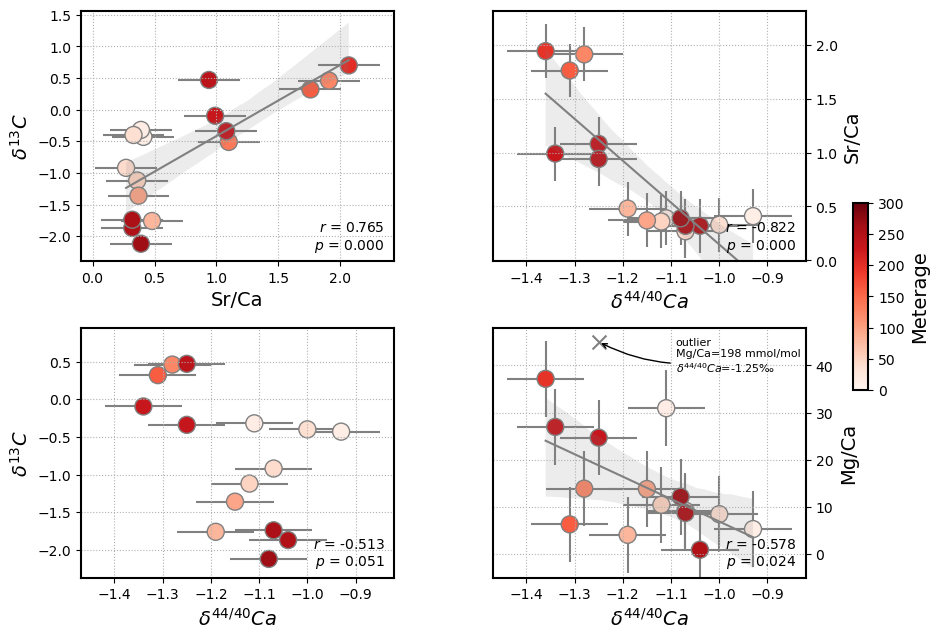

In [16]:
# Make cross plot of d13C and Sr/Ca
fig = plt.figure(figsize=(9.5,6.5))

w = [3, 3, 0.2]
h = [1, 1]

gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=w, height_ratios=h)

ax = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
axc = fig.add_subplot(gs[1,2])


ax.scatter(df["Sr/Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)
ax.errorbar(df["Sr/Ca"], df["d13C"], xerr=0.25, yerr=0.1,fmt='none', ecolor='gray',
            zorder=-2)


ax1.scatter(df["d44Ca"], df["Sr/Ca"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)
ax1.errorbar(df["d44Ca"], df["Sr/Ca"], xerr=0.08, yerr=0.25, fmt='none', ecolor='gray',
            zorder=-2)

ax1.tick_params(axis='y', left=False, right=True, labelleft=False,
                labelright=True)
ax1.yaxis.set_label_position('right')
ax1.set_ylim(-0.01, 2.31)


mplot = ax2.scatter(df["d44Ca"], df["d13C"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)

ax2.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1,fmt='none', ecolor='gray',
            zorder=-2)


ax3.scatter(df["d44Ca"], df["Mg/Ca"], c=df["Meterage"], cmap='Reds', 
           vmin=0, vmax=300, ec='gray', s=150)

ax3.errorbar(df["d44Ca"], df["Mg/Ca"], xerr=0.08, yerr=8, fmt='none', ecolor='gray',
            zorder=-2)


ax3.tick_params(axis='y', left=False, right=True, labelleft=False,
                labelright=True)
ax3.yaxis.set_label_position('right')


ax3.set_ylim(-5, 48)

ax3.scatter(-1.25, 45, marker='x', s=100, ec='gray')
ax3.annotate("outlier\nMg/Ca=198 mmol/mol\n$\delta^{44/40}Ca$=-1.25‰",
            xy=(-1.25, 45), xycoords='data',
            xytext=(-1.09, 42), textcoords='data',
            size=8, va="center", ha="left",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

for a in [ax, ax1, ax2, ax3]:
    a.grid(linestyle=":")

# Add p and r values
for a, r, p, x, y, cnt in zip([ax, ax1, ax2, ax3], Rs,
                   Ps, Xs, Ys, range(len(Xs))):
    a.text(0.97, 0.05, '$r$ = {:.3f}\n$p$ = {:.3f}'.format(r, p),
           transform=a.transAxes, ha='right')
    if cnt != 2:
        sns.regplot(x=x, y=y, ax=a, scatter=False,
                line_kws=dict(color="grey", lw=1.5))


ax.set_xlabel('Sr/Ca', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)
ax1.set_ylabel('Sr/Ca', fontsize=14)
ax1.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax2.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax2.set_ylabel('$\delta^{13}C$', fontsize=14)
ax3.set_ylabel('Mg/Ca', fontsize=14)
ax3.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)


fig.tight_layout()

fig.delaxes(axc)
axins = inset_axes(
    ax3,
    width="5%",  # width: 5% of parent_bbox width
    height="75%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1.15, 0.75, 1, 1),
    bbox_transform=ax3.transAxes,
    borderpad=0,
)

# Add colorbar
cbar = fig.colorbar(mplot, cax=axins)
cbar.ax.set_ylabel('Meterage', fontsize=14)
# plt.savefig("Figure/XPlot_stacked_d13C_d44Ca_SrCa_MgCaMeterage_RegLine.png", dpi=300)
# plt.savefig("Figure/XPlot_stacked_d13C_d44Ca_SrCa_MgCaMeterage_RegLine.svg")

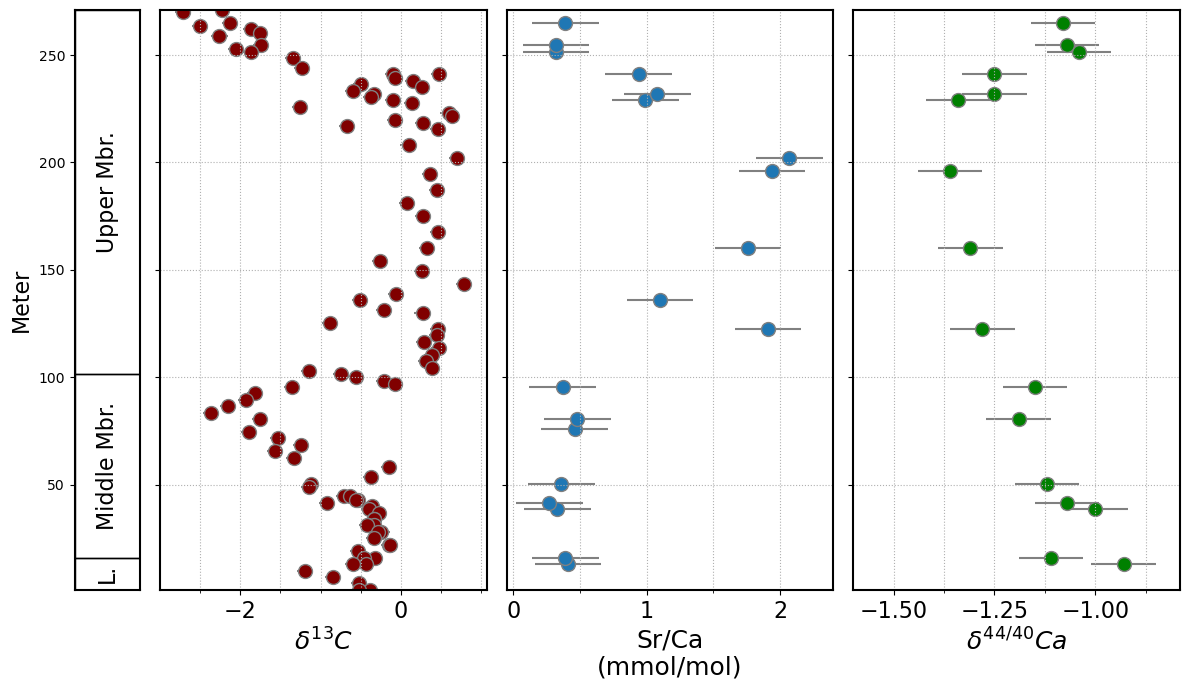

In [17]:
# Define number of column and row in subplot
row = 1
column = 4

# Width and height of axes
w = [0.8, 4, 4, 4]
h = [1]

gs_kw = dict(width_ratios=w, height_ratios=h)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=column, nrows=row, figsize=(12, 7), 
                                         sharey=True, gridspec_kw=gs_kw)

ax1.scatter(dx["d13c"], dx["Meter"], fc='maroon', ec='gray', s=100)
ax1.errorbar(dx["d13c"], dx["Meter"], xerr=0.1, fmt='none', ecolor='gray',
            zorder=-2)

ax2.scatter(df["Sr/Ca"], df["Meterage"], ec='gray', s=100)
ax2.errorbar(df["Sr/Ca"], df["Meterage"], xerr=0.25, fmt='none', ecolor='gray',
            zorder=-2)
ax3.scatter(df["d44Ca"], df["Meterage"], fc='green', ec='gray', s=100)
ax3.errorbar(df["d44Ca"], df["Meterage"], xerr=0.08, fmt='none', ecolor='gray',
            zorder=-2)



ax1.set_ylim(1, 271)
ax2.set_xlim(-0.05, 2.4)
ax3.set_xlim(-1.6, -0.79)

# Plot Formation
ax0.set_ylabel('Meter', fontsize=16)
trans = ax0.get_yaxis_transform() # Set transform

for i in range(len(fm)):
    # Draw formational boundaries using Rectangle
    ax0.add_patch(Rectangle(xy=[0, fm_base[i]],
                            width=1, height=fm_h[i], transform=trans,
                            ec='black', fc='None'))
    
    # Formation
    ax0.text(0.5, fm_base[i] + fm_h[i]*0.5, fm[i], rotation=90,
             horizontalalignment='center', verticalalignment='center',
             transform=trans, fontsize=16)

ax0.tick_params(axis='x', bottom=False, labelbottom=False)

ax1.set_xlabel('$\delta^{13}C$', fontsize=18)
ax2.set_xlabel('Sr/Ca\n(mmol/mol)', fontsize=18)
ax3.set_xlabel('$\delta^{44/40}Ca$', fontsize=18)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='x', labelsize=16)

ax1.tick_params(axis='y', labelsize=16)

minor_locator = ticker.MultipleLocator(0.5)
ax2.xaxis.set_minor_locator(minor_locator)

minor_locator = ticker.MultipleLocator(0.5)
ax1.xaxis.set_minor_locator(minor_locator)

minor_locator = ticker.MultipleLocator(0.125)
ax3.xaxis.set_minor_locator(minor_locator)


for ax in [ax1,ax2, ax3]:
    ax.grid(which='both', linestyle=':')

plt.tight_layout()
plt.savefig("Figure/StratPlot_d13C_SrCa_d44Ca_Formation.png", dpi=300)
plt.savefig("Figure/StratPlot_d13C_SrCa_d44Ca_Formation.svg")

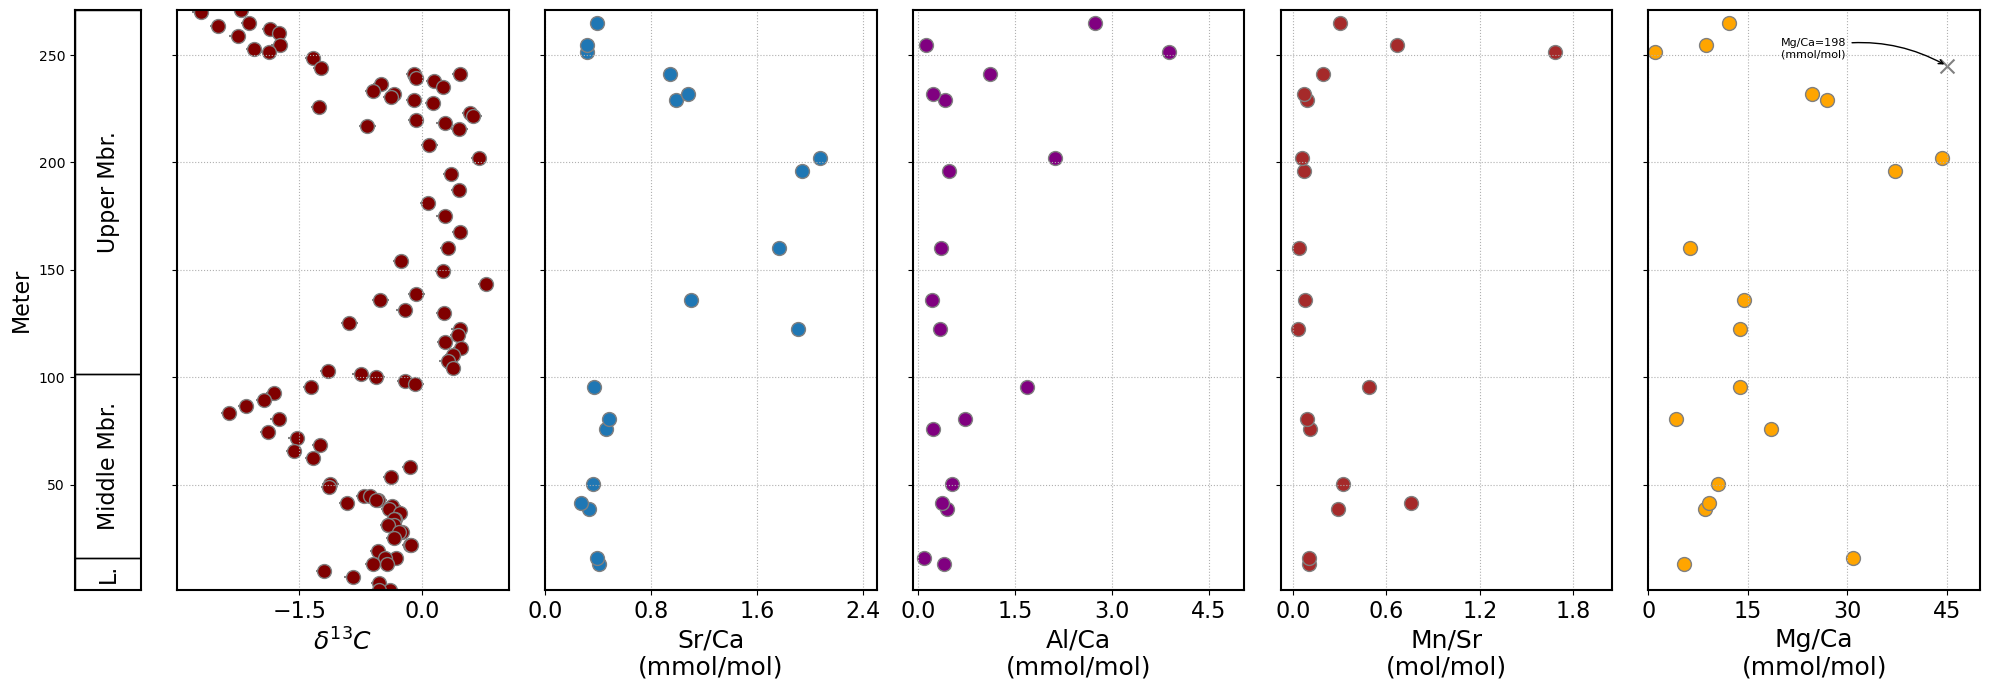

In [18]:
# Define number of column and row in subplot
row = 1
column = 6

# Width and height of axes
w = [0.8, 4, 4, 4, 4, 4]
h = [1]

gs_kw = dict(width_ratios=w, height_ratios=h)

fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=column, nrows=row, figsize=(20, 7), 
                                         sharey=True, gridspec_kw=gs_kw)

ax1.scatter(dx["d13c"], dx["Meter"], fc='maroon', ec='gray', s=100)
ax1.errorbar(dx["d13c"], dx["Meter"], xerr=0.1, fmt='none', ecolor='gray',
            zorder=-2)

ax2.scatter(df["Sr/Ca"], df["Meterage"], ec='gray', s=100)


ax3.scatter(df["Al/Ca"], df["Meterage"], fc='purple', ec='gray', s=100)


ax4.scatter(df['Mn/Sr'], df["Meterage"], fc='brown', ec='gray', s=100)


ax5.scatter(df['Mg/Ca'], df["Meterage"], fc='orange', ec='gray', s=100)

ax5.annotate("Mg/Ca=198\n(mmol/mol)",
            xy=(45, 245), xycoords='data',
            xytext=(20, 253), textcoords='data',
            size=8, va="center", ha="left",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))
ax5.scatter(45, 245, marker='x', s=100, ec='gray')

ax1.set_ylim(1, 271)
ax2.set_xlim(0, 2.5)
ax5.set_xlim(0, 50)

# Plot Formation
ax0.set_ylabel('Meter', fontsize=16)
trans = ax0.get_yaxis_transform() # Set transform

for i in range(len(fm)):
    # Draw formational boundaries using Rectangle
    ax0.add_patch(Rectangle(xy=[0, fm_base[i]],
                            width=1, height=fm_h[i], transform=trans,
                            ec='black', fc='None'))
    
    # Formation
    ax0.text(0.5, fm_base[i] + fm_h[i]*0.5, fm[i], rotation=90,
             horizontalalignment='center', verticalalignment='center',
             transform=trans, fontsize=16)

ax0.tick_params(axis='x', bottom=False, labelbottom=False)

ax1.set_xlabel('$\delta^{13}C$', fontsize=18)
ax2.set_xlabel('Sr/Ca\n(mmol/mol)', fontsize=18)
ax3.set_xlabel('Al/Ca\n(mmol/mol)', fontsize=18)
ax4.set_xlabel('Mn/Sr\n(mol/mol)', fontsize=18)
ax5.set_xlabel('Mg/Ca\n(mmol/mol)', fontsize=18)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.tick_params(axis='x', labelsize=16)

ax1.tick_params(axis='y', labelsize=16)

ax3.set_xlim(-0.08, 5.05)
ax4.set_xlim(-0.08, 2.05)

for ax in [ax1,ax2, ax3, ax4, ax5]:
    ax.grid(which='both', linestyle=':')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.tight_layout()
plt.savefig("Figure/StratPlot_d13C_SrCa_AlCa_MnSr_Formation.png", dpi=300)
plt.savefig("Figure/StratPlot_d13C_SrCa_AlCa_MnSr_Formation.svg")

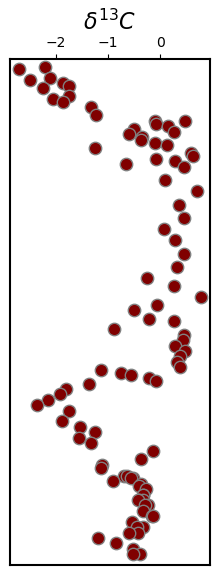

In [19]:
# Plot Carbon Isotope

fig, ax1 = plt.subplots(1,1, figsize=(2.3, 5.85))

ax1.scatter(dx["d13c"], dx["Meter"], fc='maroon', ec='gray', s=80)
ax1.set_ylim(-5, 275)
ax1.set_xlabel('$\delta^{13}C$', fontsize=16)

ax1.tick_params(axis='y', left=False, labelleft=False)
ax1.tick_params(axis='x', bottom=False, labelbottom=False, top=True, labeltop=True)
ax1.xaxis.set_label_position('top')

plt.tight_layout()
plt.savefig('Figure/d13C_MP.svg')